# Homework 03 - Python introduction

In [ ]:
# Exercise 1 - Terminology

Describe the following terms with your own words:

***Function:*** is a certain amount of code that is used for a certain action. They can be built-in which the 
                    language itself offers or (most of them) are made by the individual

***Variable:*** are vessels of information, they store and name(label) inforamtion(data) in memory

***Calling a function:*** by calling a certain function we are telling the programm to execute it 

***String:*** is a train of chracters (some form of variable)

### Exercise 2 - spurious correlations

Reproduce a *spurious correlations* plot using `plt.plot()`.

Plot the time series `sociology_doctorates` and `space_launches` on a relative scale, i.e. as percentage of the last data point (i.e. years on the x-axis, relative data on the y-axis, the last data point in both time series should be 100%). Add a second plot which displays the relation between both data sets as scatter plot by using `plt.plot(dataset1, dataset2, 'o')` (data set 1 on x-axis, data set 2 on y-axis absolute units, not percentage).

Instead using the given time series, you can also use any other spurious correlation, if you want to search a different dataset.

Analyze both plots, come up with a wrong conclusion and explain why it is wrong.

Don't forget to label the axis!

![Spurious correlations](spurious-correlations.svg)

Source: https://www.tylervigen.com/spurious-correlations

In [1]:
sociology_doctorates = [601, 579, 572, 617, 566, 547, 597, 580, 536, 579, 576, 601, 664]
space_launches = [54, 46, 42, 50, 43, 41, 46, 39, 37, 45, 45, 41, 54]
years = list(range(1997, 2009 + 1))

In [2]:
import math 
new_list = []
value = 664
for x in sociology_doctorates:
    new_list.append(x/value)  

In [3]:
print (new_list)

[0.9051204819277109, 0.8719879518072289, 0.8614457831325302, 0.9292168674698795, 0.8524096385542169, 0.8237951807228916, 0.8990963855421686, 0.8734939759036144, 0.8072289156626506, 0.8719879518072289, 0.8674698795180723, 0.9051204819277109, 1.0]


In [4]:
new_list_b =[]
value_b = 54
for x in space_launches:
    new_list_b.append(x/value_b)

In [5]:
print (new_list_b)

[1.0, 0.8518518518518519, 0.7777777777777778, 0.9259259259259259, 0.7962962962962963, 0.7592592592592593, 0.8518518518518519, 0.7222222222222222, 0.6851851851851852, 0.8333333333333334, 0.8333333333333334, 0.7592592592592593, 1.0]


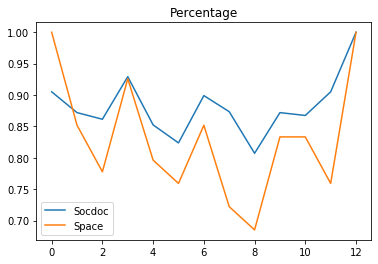

In [6]:
import matplotlib.pyplot as plt

plt.plot (new_list,label='Socdoc')
plt.plot (new_list_b, label ='Space')

plt.title('Percentage')

plt.legend()
plt.show()

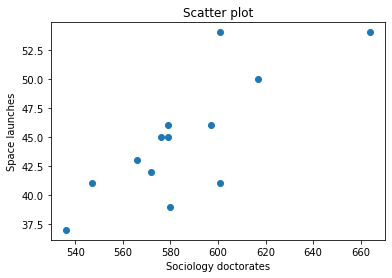

In [7]:
import matplotlib.pyplot as plt
import pylab
dataset1= sociology_doctorates
dataset2= space_launches

plt.xlabel('Sociology doctorates')
plt.ylabel('Space launches')
plt.title('Scatter plot')
plt.plot(dataset1,dataset2,'o')
plt.show()

### Exercise 3 - Flatten the curve

Use the logistic growth model to plot an oversimplified version of the [#flattenthecurve](https://www.biospace.com/getasset/fc2b8ad6-697f-49d5-827e-50f4901baf53/) [graphs](https://evilspeculator.com/wp-content/uploads/2020/03/flattenthecurve.jpg).

Write a function `new_infections(t, k)` which returns the number of new infections given by the following formula:

$i_{\textrm{new}}(t):=\frac{e^\left(-k \cdot P \cdot t\right) \cdot k \cdot P^2 \cdot \left(-1 + \frac{P}{i_0}\right)}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(-1 + \frac{P}{i_0}\right) \right)^2}$

Plot the number of infections for $t=0,\ldots,250$, $P=1\,000\,000$, $i_0=1$ and $k= \frac{3}{P \cdot 10}$.

Also add a horizontal line and label it with "healthcare system capacity".

Then analyze the plot for different values of $k$ and explain in detail why one should not use this model/plot to predict the outcome of an epidemic.

Bonus question: Is there something one can still learn from it?

# Motivation

The motivation is not important for the programming task. There is no need to understand all details in order to do the exercise.

For a fixed population with $P$ individuals, $i(t)$ is the number of infections at time $t$. We assume that every individual stays infectious once infected. 

Choosing a random pair of individuals from the population, a new infection will take place with probability $2 \cdot \frac{i(t)}{P} \cdot \frac{P - i(t)}{P}$. If we assume that every infected individual will meet approximately $c$ others in every time step (and infect them if they are not yet infected), there is a total number of contacts $\frac{c \cdot P}{2}$ in every time step. That means we expect a total number of new infections:

$i_{\textrm{new}}(t) = \frac{c \cdot P}{2} \cdot 2 \cdot \frac{i(t)}{P} \cdot \frac{P - i(t)}{P} = \underbrace{\frac{c}{P}}_{=:k} \cdot \left(i(t) \cdot \left(P - i(t)\right) \right)$

This leads to the differential equation:

$i'(t) = i_{\textrm{new}}(t) = k \cdot \left(i(t) \cdot \left(P - i(t)\right) \right)$

A solution is given by:

$i(t) = \frac{P}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(\frac{P}{i_0} - 1\right)\right)}$

Differentiating $i(t)$ gives the number of new infections:

$i_{\textrm{new}}(t):=i'(t) = \frac{e^\left(-k \cdot P \cdot t\right) \cdot k \cdot P^2 \cdot \left(-1 + \frac{P}{i_0}\right)}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(-1 + \frac{P}{i_0}\right) \right)^2}$


9[3blue1brown](https://www.youtube.com/watch?v=gxAaO2rsdIs) has a great video on the topic. If you are interested in a model which is a bit closer to the real world, but still quite simple, have a look at the [SIR model](https://www.youtube.com/watch?v=Qrp40ck3WpI). A large part of this is inspired by the [German Wikipiedia page](https://de.wikipedia.org/wiki/Logistische_Funktion).

In [8]:
##### Solution

#Write your code here:
    
import math
t=[i for i in range(1,251)]
P = 1000000
i_0 = 1
k = (3/(P*10))
def new_infections(t, k):
    return ((math.exp(-k*P*t))*k*(P**2)*((-1+P/i_0))/(1+(math.exp(-k*P*t))*(-1+(P/i_0)))**2)

In [9]:
print (new_infections(1,k))

0.40495695395959497


In [10]:
new_list=[]
value = new_infections
for x in t:
    new_list.append(new_infections(x,k))

In [11]:
print (new_list)

[0.40495695395959497, 0.5466341946846461, 0.7378780414464094, 0.9960294589709191, 1.3444960143442433, 1.8148740954346188, 2.4498134122351813, 3.306883315957851, 4.46379114023539, 6.025425052155793, 8.133358769938253, 10.978677696635447, 14.819285296801022, 20.003251339691538, 27.000305191640596, 36.44430443653563, 49.190483423247706, 66.39258850905486, 89.60674082554308, 120.9311650688006, 163.1939461571543, 220.204914839281, 297.0928238591315, 400.7553430170333, 540.4571590946898, 728.6204368896955, 981.8613261973533, 1322.3341788922173, 1779.4475869287921, 2392.0052721771717, 3210.7855652457524, 4301.480221053183, 5747.725183275085, 7653.6108930035925, 10144.47855895875, 13363.919566602264, 17463.71047699569, 22582.206922798287, 28806.31608900691, 36114.289461922875, 44303.74808187301, 52923.39367503051, 61244.98287391167, 68322.11415581433, 73164.0431809392, 74995.48993603501, 73502.71016288585, 68942.27690187233, 62051.74615342765, 53812.40575098579, 45185.25440623436, 36925.683058

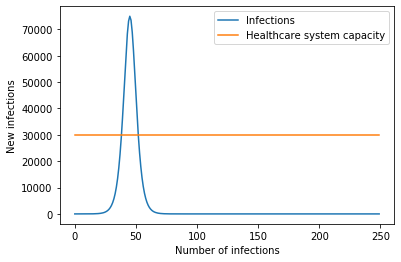

In [18]:
y = len(t)* [30000]
import matplotlib.pyplot as plt

plt.plot (new_list,label = 'Infections')
plt.plot (y,label = 'Healthcare system capacity')

plt.xlabel('Number of infections')
plt.ylabel('New infections')

plt.legend()
plt.show()

In [19]:
k_value_list = [5/(1000000*10),4/(1000000*10),3/(1000000*10),2/(1000000*10),1/(1000000*10)]
for k in k_value_list:
    infections = [None] * len(t)
    for i in range(len(t)):
        infections[i] = new_infections(i,k)

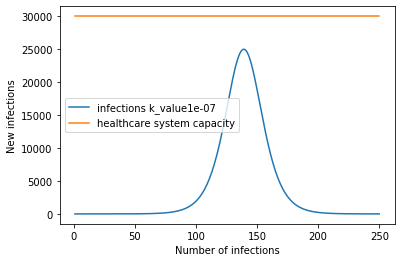

In [20]:
plt.plot(t,infections, label = 'infections k_value' + str(k))
plt.plot(t,y, label = 'healthcare system capacity')
plt.xlabel('Number of infections')
plt.ylabel('New infections')
plt.legend()
plt.show()

##### Bonus: Interactive plot

If you want an interactive widget to control the parameter c, you can use the following code.

**Warning:** After running `%matplotlib notebook` you cannot plot in other cells any longer. Restart the Jupyter kernel and refresh the browser window to disable again.

```Python
%matplotlib notebook
from ipywidgets import interact

line, = plt.plot(x, y)

# write here more plotting code (axis label etc)

def update(c=3.0/10.):
    line.set_ydata([new_infections(t, c  / P) for t in time_range])

interact(update);
```

### Exercise 4 - Fibonacci 

Write a function `fibonacci(n)` which calculates the n-th [Fibonacci number](https://en.wikipedia.org/wiki/Fibonacci_number), defined by $f(0)=0$, $f(1)=1$ and $f(n) = f(n-1)+f(n-2)$.

Use the function to calculate $f(100)$.

In [21]:
def fibonacci(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    elif n == 2:
        return 1
    elif n > 2:
        return fibonacci(n-1) +fibonacci(n-2)

In [ ]:
print (fibonacci(100))